In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("uni_bi_multi_analysis.xls")

In [4]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


##### 1. Find the aggregate sales among branches

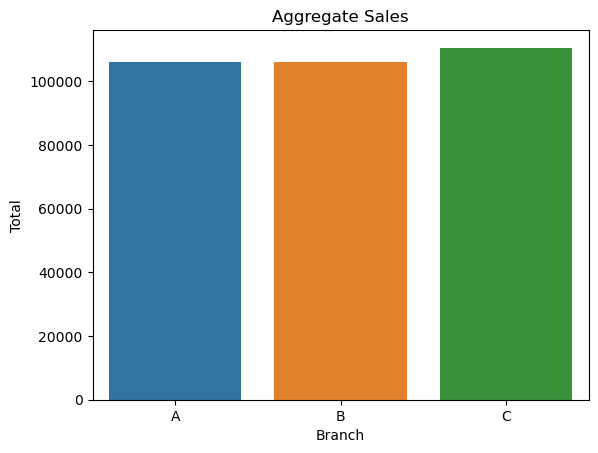

In [5]:
agg = df.groupby("Branch").sum("Total").reset_index()#
agg = agg.iloc[:,[0,4]]#.plot(x = "Branch" , y = "Total", kind = "bar")
sns.barplot(data=agg, x='Branch', y='Total')
plt.xlabel('Branch')
plt.ylabel('Total')
plt.title('Aggregate Sales')
plt.show()

<Axes: xlabel='Branch', ylabel='Total'>

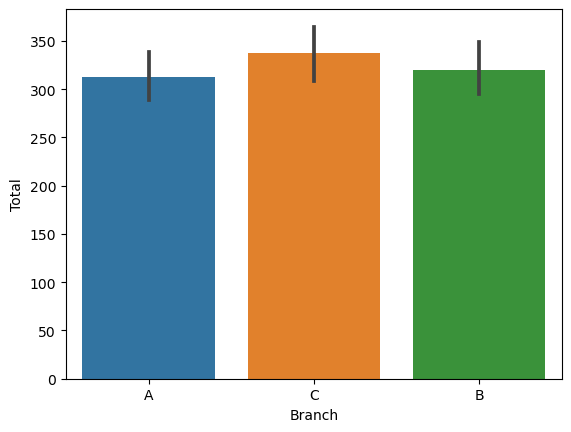

In [7]:
agg2 = df.groupby("Branch").agg("Total") 
agg2 = df.reset_index() 

sns.barplot(data=agg2, x="Branch", y="Total") 

##### 2. Find the most popular payment method used by customers 

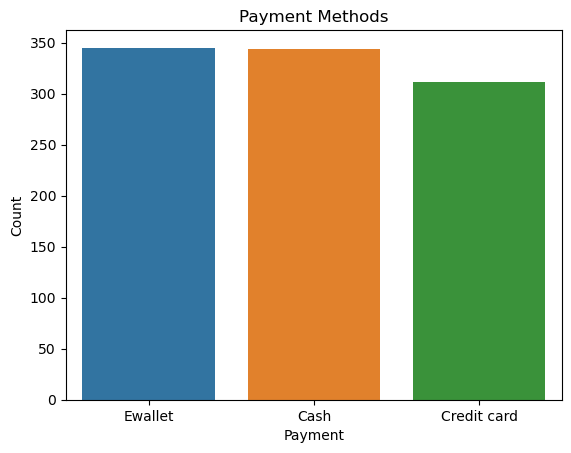

In [8]:
sns.countplot(df, x = "Payment")
plt.xlabel("Payment")
plt.ylabel("Count")
plt.title("Payment Methods")
plt.show()

##### 3. Find the distribution of customer ratings

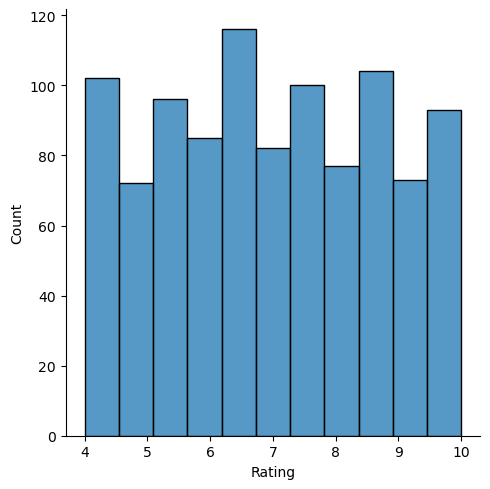

In [9]:
sns.displot(df.Rating)

##### 4. Find the distribution of cost of goods sold

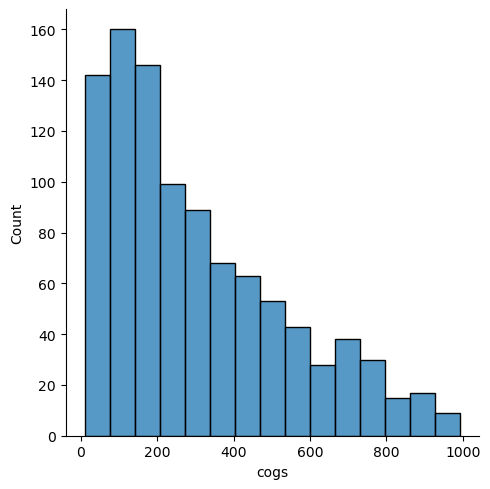

In [10]:
sns.displot(df.cogs)

##### 5. Does the cost of goods sold affect the ratings that the customer provide?

<Axes: xlabel='Rating', ylabel='cogs'>

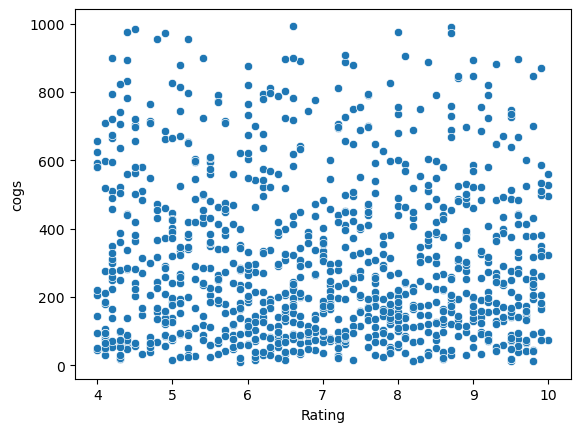

In [11]:
sns.scatterplot(data = df, x = "Rating", y = "cogs")

##### 6. Does gross income affect the ratings that the customers provide?

<Axes: xlabel='Rating', ylabel='gross income'>

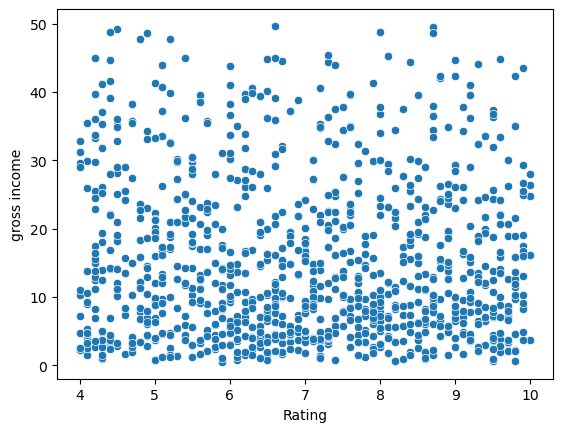

In [12]:
sns.scatterplot(data = df, x = df.Rating , y = "gross income")

##### 7. Find the most profitable branch as per gross income

<Axes: xlabel='Branch', ylabel='gross income'>

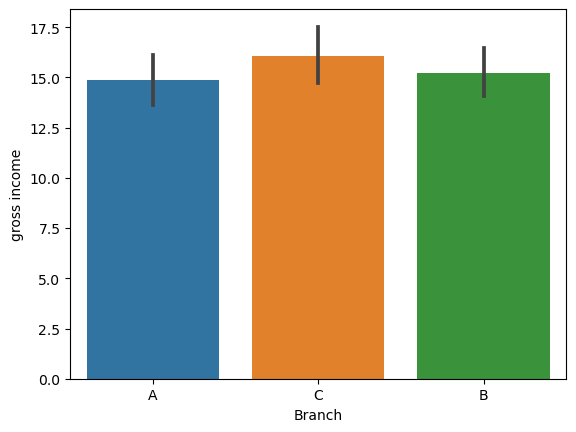

In [14]:
sns.barplot(x = df["Branch"] , y = df["gross income"])

##### 8. Is there any relationship between gender and gross income?Is there any relationship between gender and gross income?

<Axes: xlabel='Gender', ylabel='gross income'>

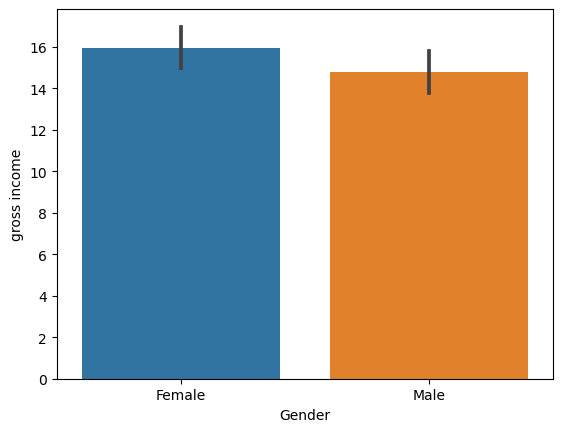

In [15]:
sns.barplot(x = df['Gender'], y = df['gross income'])

##### 9. Find the product line that generates the most income

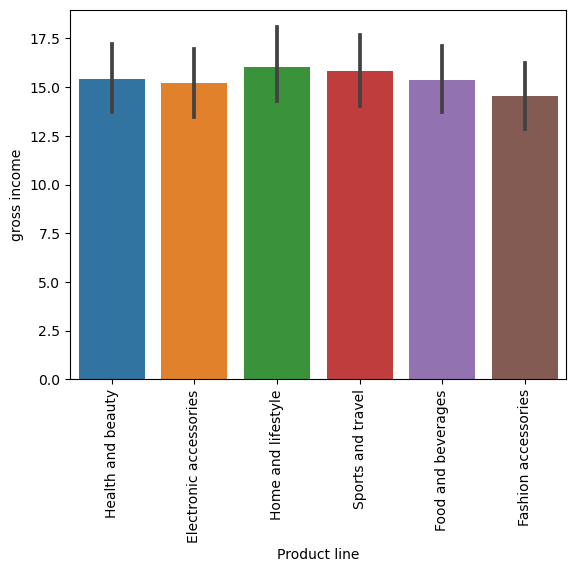

In [16]:
sns.barplot(x = df['Product line'], y = df['gross income'])
plt.xticks(rotation = 90)
plt.show()

##### 10. Find the highest unit price in the product line

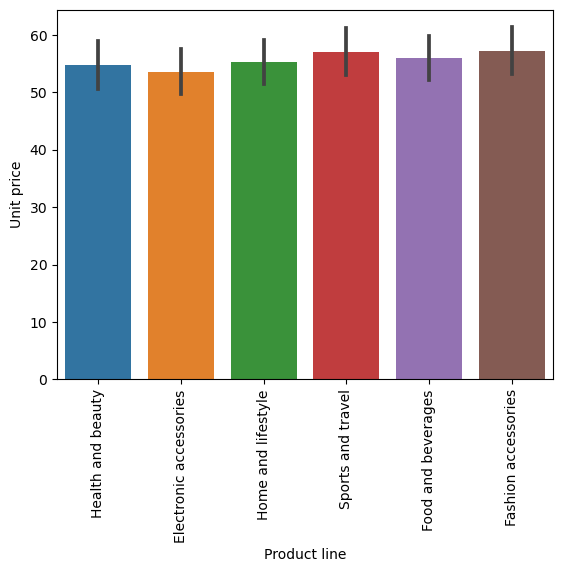

In [17]:
sns.barplot(x = df['Product line'], y = df['Unit price'])
plt.xticks(rotation = 90)
plt.show()

##### 11. Find different payment methods used by customers citywise

In [20]:
# df_city = pd.DataFrame(df.groupby(['City']).value_counts(['Payment'])).reset_index()
# df_city.columns = ['City','Payment','Count']
# df_city
pp = pd.crosstab(df['Payment'],df['City'])
# plt.xticks(rotation = 'horizontal')
# plt.show()
pp

City,Mandalay,Naypyitaw,Yangon
Payment,,,
Cash,110,124,110
Credit card,109,98,104
Ewallet,113,106,126


In [24]:
#sns.set_theme(style = 'whitegrid')
sns.barplot(data = "pp" , x = "City",y="Payment") 

AttributeError: 'str' object has no attribute 'get'

In [ ]:
#np.assign
#np.where
#np.select